<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 5</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [ ]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong>Problem 1: Quadrature </strong></h2>
</div>
Let's looked at different quadrature methods and rules. 


<div style="text-align: center;">
    <h2><strong> Midpoint rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx (b - a) \cdot f\left(\frac{a + b}{2}\right)
$$

<div style="text-align: center;">
    <h2><strong> Trapezoidal Rule  </strong></h2>
</div>

$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]$$

<div style="text-align: center;">
    <h2><strong> Simpson's Rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{3} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right]$$


## A) 
Define a class for all quadrature techniques.

In [2]:
class Quad_:
    def __init__(self, f, a, b, N):
        '''The class Quadrature takes four inputs: 
         f: a function input,
         a, b: left and right points,
         N: number of grid points.'''
        self.f = f
        self.a = a
        self.b = b
        self.N = N

    def mid_quad(self):
        h = (self.b - self.a) / self.N
        integral = 0
        for i in range(self.N):
            x_mid = self.a + (i + 0.5) * h
            integral += h * self.f(x_mid)
        return integral

    def trapz_quad(self):
        h = (self.b - self.a) / self.N
        integral = 0.5 * (self.f(self.a) + self.f(self.b))
        for i in range(1, self.N):
            integral += self.f(self.a + i * h)
        return h * integral

    def simpson_quad(self):
        if self.N % 2 != 0:
            raise ValueError("Simpson's rule requires an even number of intervals (N should be even).")

        h = (self.b - self.a) / self.N
        integral = self.f(self.a) + 4 * self.f((self.a + self.b) / 2) + self.f(self.b)

        for i in range(1, self.N):
            x = self.a + i * h
            if i % 2 == 0:
                integral += 2 * self.f(x)
            else:
                integral += 4 * self.f(x)

        return (h / 3) * integral

Midpoint Rule: 2.625
Trapezoidal Rule: 2.75
Simpson's Rule: 3.333333333333333


## B) 
Write the above three quadrature rules as class methods **without any pre-defined function from any package** 1)  Midpoint rule 2) Trapezoidal Rule 3) Simpson's Rule. You need to figure out what additional inputs each rule needs. 

In [ ]:
# Add the following to the class in part A). 
def mid_quad(self,...):
    pass
def trapz_quad(self,...):
    pass
def simpson_quad(self,...):
    pass



<div style="text-align: center;">
    <h3><strong> Gauss-Legendre Quadrature </strong></h3>
</div>

$$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i)$$


## C)
Since the range is from a to b, let's make a variable change,
$$x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2}$$

Calculate the above condition **analytically**,
<br> 
$$\sum_{i=1}^{N} w_i \cdot f\left(\frac{b - a}{2} x_i + \frac{a + b}{2}\right) \cdot \frac{b - a}{2}$$
<br><br> **Steps:** <br>
<br>
The $\frac{b - a}{2}$ comes from the derivative dx substitution, and everything else is pure substitution.
<br> <br> 
You should get something like this: 
$$\int_{a}^b f(x)dx = \frac{b-a}{2} \sum_i w_i f(\frac{b - a}{2} x_i + \frac{a + b}{2})$$

<div style="text-align: center;">
    <h3><strong> Legendre polynomials </strong></h3>
</div>
To find the position and weights of an order M Gauss-Legendre Quadrature, we need to calculate the roots of an order-M Legendre polynomial,
$$(1 - x^2) \frac{d^2 P_M(x)}{dx^2} - 2x \frac{dP_M(x)}{dx} + M(M + 1)P_M(x) = 0,
$$
and the solutions are given by the following:  
$$P_M(x) = \frac{1}{2^n n!} \frac{d^M}{dx^M} \left[(x^2 - 1)^M\right]$$

## D)
Write a child class named Gauss_Quad_ inherits methods from its parent class Quad_. This class takes an additional input, called order. Define a new method that outputs an order-M Legendre polynomial. Plot the following Legendre polynomials: M=[1,2,3,4,5]. 

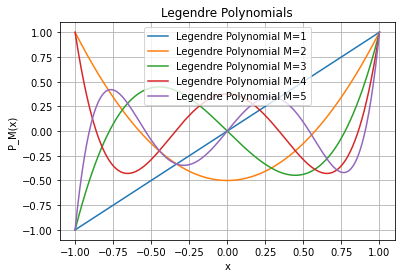

Gauss-Legendre Quadrature Integral: 0.666666666666667


In [12]:
import numpy as np
import matplotlib.pyplot as plt

class Gauss_Quad_(Quad_):
    def __init__(self, order, f, a, b, N):
        super().__init__(f, a, b, N)
        self.order = order

    def legendre_poly(self, x, order):
        if order == 0:
            return np.ones_like(x)
        elif order == 1:
            return x
        else:
            P0 = np.ones_like(x)
            P1 = x
            for n in range(2, order + 1):
                P = ((2 * n - 1) * x * P1 - (n - 1) * P0) / n
                P0 = P1
                P1 = P
            return P

    def legendre_derivative(self, x, order):
        return (x * self.legendre_poly(x, order) - order * self.legendre_poly(x, order - 1)) / (x**2 - 1)

    def newton_method_root(self, order):
        # Initial guess for the root using the cosines of equally spaced angles
        x = np.cos(np.pi * (np.arange(1, order + 1) - 0.25) / (order + 0.5))

        while True:
            delta_x = self.legendre_poly(x, order) / self.legendre_derivative(x, order)
            x -= delta_x
            if np.all(np.abs(delta_x) < 1e-15):
                break

        w = 2 / ((1 - x**2) * self.legendre_derivative(x, order)**2)
        return x, w

    def gauss_quad(self):
        positions, weights = self.newton_method_root(self.order)
        integral = 0
        for i in range(self.order):
            integral += weights[i] * self.f(positions[i])
        return integral

    def plot_legendre_polynomials(self, M_values):
        x = np.linspace(-1, 1, 400)
        for M in M_values:
            legendre_poly = self.legendre_poly(x, M)
            plt.plot(x, legendre_poly, label=f'Legendre Polynomial M={M}')

        plt.title('Legendre Polynomials')
        plt.xlabel('x')
        plt.ylabel('P_M(x)')
        plt.grid(True)
        plt.legend()
        plt.show()

    def calculate_and_write_quadrature(self, M_values):
        with open("gauss_legendre_quadrature.txt", "w") as file:
            file.write("M\tPositions\tWeights\n")
            for M in M_values:
                positions, weights = self.newton_method_root(M)
                positions_str = ", ".join(map(str, positions))
                weights_str = ", ".join(map(str, weights))
                file.write(f"{M}\t{positions_str}\t{weights_str}\n")

# Example usage:
def example_function(x):
    return x**2

a = -1
b = 1
N = 4
order = 5

quad = Gauss_Quad_(order, example_function, a, b, N)
quad.plot_legendre_polynomials(M_values=[1, 2, 3, 4, 5])
integral = quad.gauss_quad()
print(f"Gauss-Legendre Quadrature Integral: {integral}")

<div style="text-align: center;">
    <h3><strong> Newton's Method </strong></h3>
</div>
The positions of an order M Gauss-Legendre Quadrature are calculated by finding roots of an order-M Legendre polynomial,
 <br>  <br> 
$$P_M(x)=0.$$
 <br> 
To numerically find those roots (M of them), we can use the Newton's method: 
 <br> 
$$x_{n+1} = x_{n} - \frac{P_M(x_{n})}{P_M'(x_{n})}.$$
You should be careful on the initial guess.
 <br> 
The weights $w_i$ for Gauss-Legendre Quadrature are calculated as:
$$w_i = \frac{2}{(1 - x_i^2) [P'_M(x_i)]^2}$$
where $P'_M(x_i)$ is the derivative of the Legendre polynomial of degree M evaluated at each root $x_i$. 

## E) 
 Calculate 'M' position and weights for Gaussian quadrature integration between 'a' and 'b' with the Newton's method. Returns a tuple of 2 arrays, the first array is the position of points and second array is the corresponding weights. Output an text file that contains the roots and weights for M=[1,2,3,4,5]. 

In [ ]:
# Add the following to the class in part D). 
def newton_method_root(self,...):

    return root,weights


## F) 
Using the the following information,
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html
, calculate the roots and weights for M=[1,2,3,4,5]. Do they agree with what you calculate in E)?  

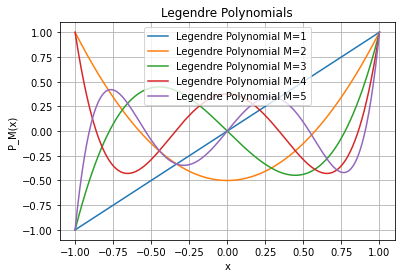

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

class Gauss_Quad_(Quad_):
    def __init__(self, order, f, a, b, N):
        super().__init__(f, a, b, N)
        self.order = order

    def legendre_poly(self, x, order):
        return legendre(order)(x)

    def legendre_derivative(self, x, order):
        return order * (x * self.legendre_poly(x, order) - self.legendre_poly(x, order - 1)) / (x**2 - 1)

    def newton_method_root(self, order):
        # Initial guess for the root using the cosines of equally spaced angles
        x = np.cos(np.pi * (np.arange(1, order + 1) - 0.25) / (order + 0.5))
        
        while True:
            delta_x = self.legendre_poly(x, order) / self.legendre_derivative(x, order)
            x -= delta_x
            if np.all(np.abs(delta_x) < 1e-15):
                break
        
        w = 2 / ((1 - x**2) * self.legendre_derivative(x, order)**2)
        return x, w

    def plot_legendre_polynomials(self, M_values):
        x = np.linspace(-1, 1, 400)
        for M in M_values:
            legendre_poly = self.legendre_poly(x, M)
            plt.plot(x, legendre_poly, label=f'Legendre Polynomial M={M}')

        plt.title('Legendre Polynomials')
        plt.xlabel('x')
        plt.ylabel('P_M(x)')
        plt.grid(True)
        plt.legend()
        plt.show()

    def calculate_and_write_quadrature(self, M_values):
        with open("gauss_legendre_quadrature.txt", "w") as file:
            file.write("M\tPositions\tWeights\n")
            for M in M_values:
                positions, weights = self.newton_method_root(M)
                positions_str = ", ".join(map(str, positions))
                weights_str = ", ".join(map(str, weights))
                file.write(f"{M}\t{positions_str}\t{weights_str}\n")

# Example usage:
def example_function(x):
    return x**2

a = -1
b = 1
N = 4
order = 5

quad = Gauss_Quad_(order, example_function, a, b, N)
quad.plot_legendre_polynomials(M_values=[1, 2, 3, 4, 5])
quad.calculate_and_write_quadrature(M_values=[1, 2, 3, 4, 5])

## G)
Based on the roots and weights, write a method that output the Gauss-Legendre Quadrature. 

In [ ]:
# Add the following to the class in part D).
def gauss_quad(self,...):
    pass 


<div style="text-align: center;">
    <h3><strong> Quadrature on test functions </strong></h3>
</div>

In the following question, we want to Use the above four methods, mid_quad, trapz_quad, simpson_quad, gauss_quad, to numerically calculate the quarature on two test functions ($k\geq 0)$

A general k-th order polynomial with a quadrature, 
$$I^{\rm T=A}_{\rm true}=\int_{a}^b dx x^k=\frac{1}{k+1}(b^{k+1}-a^{k+1})$$

A Fermi–Dirac distribution with a quadrature, 
$$I^{\rm T=B}_{\rm true}=\int_{a}^b dx \frac{1}{{1 + e^{-kx}}}=\frac{1}{k}(\log(e^{kb}+1)-\log(e^{ka}+1))$$


Let's define the following: for each order k and N, we have the quadrature value and the relative error,
1) mid_quad: $M(k,N)$,<br><br> $\Delta M(k,N)=2\frac{I_{\rm true}-M(k,N)}{I_{\rm true}+M(k,N)}$,
<br><br><br>
2) trapz_quad: $T(k,N)$,<br><br> $\Delta T(k,N)=2\frac{I_{\rm true}-T(k,N)}{I_{\rm true}+T(k,N)}$,
<br><br><br>
3) simpson_quad: $S(k,N)$,<br><br> $\Delta S(k,N)=2\frac{I_{\rm true}-S(k,N)}{I_{\rm true}+S(k,N)}$,
<br><br><br>
4) gauss_quad: $G(k,N)$,<br><br> $\Delta G(k,N)=2\frac{I_{\rm true}-G(k,N)}{I_{\rm true}+G(k,N)}$,

Let's make the following heatmap for each quadrature method above, 1-4), over the range $[0,1]$: 

y-axis: k from 0 to 10

x-axis: N from 10 to $10^5$

value: relative error




## H) Polynomial





In [ ]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

class QuadratureComparison:
    def __init__(self, a, b, max_k, max_N):
        self.a = a
        self.b = b
        self.max_k = max_k
        self.max_N = max_N

    def calculate_relative_error(self, true_value, approx_value):
        return 2 * (true_value - approx_value) / (true_value + approx_value)

    def generate_heatmap(self, quadrature_method, title):
        k_values = np.arange(self.max_k + 1)
        N_values = np.logspace(1, np.log10(self.max_N), num=50, dtype=int)
        relative_errors = np.zeros((len(k_values), len(N_values)))

        for i, k in enumerate(tqdm(k_values, desc=f'Calculating {title}')):
            for j, N in enumerate(N_values):
                approx_value = getattr(self, quadrature_method)(k, N)
                true_value = self.true_integral_poly(k)
                relative_error = self.calculate_relative_error(true_value, approx_value)
                relative_errors[i, j] = relative_error

        plt.figure(figsize=(12, 8))
        sns.heatmap(relative_errors, cmap='coolwarm', annot=False, xticklabels=N_values, yticklabels=k_values)
        plt.title(title)
        plt.xlabel('N')
        plt.ylabel('k')
        plt.show()

    def mid_quad(self, k, N):
        h = (self.b - self.a) / N
        integral = 0
        for i in range(N):
            x_mid = self.a + (i + 0.5) * h
            integral += h * x_mid**k
        return integral

    def trapz_quad(self, k, N):
        h = (self.b - self.a) / N
        integral = 0.5 * (self.a**k + self.b**k)
        for i in range(1, N):
            x = self.a + i * h
            integral += x**k
        return h * integral

    def simpson_quad(self, k, N):
        if N % 2 == 1:
            N += 1  # Make N even
        h = (self.b - self.a) / N
        integral = self.a**k + 4 * ((self.a + self.b) / 2)**k + self.b**k

        for i in range(1, N, 2):  # Skip even indices
            x = self.a + i * h
            integral += 4 * x**k

        for i in range(2, N-1, 2):  # Skip odd indices
            x = self.a + i * h
            integral += 2 * x**k

        return (h / 3) * integral

    def gauss_quad(self, k, N):
        positions, weights = self.newton_method_root(k, N)
        integral = 0
        for i in range(N):
            P = self.legendre_poly(positions[i], k)
            integral += weights[i] * P
        return integral

    def newton_method_root(self, k, N):
        x = np.cos(np.pi * (np.arange(1, N + 1) - 0.25) / (N + 0.5))
        while True:
            delta_x = self.legendre_poly(x, k) / self.legendre_derivative(x, k)
            x -= delta_x
            if np.all(np.abs(delta_x) < 1e-15):
                break
        w = 2 / ((1 - x**2) * self.legendre_derivative(x, k)**2)
        return x, w

    def legendre_poly(self, x, k):
        if k == 0:
            return np.ones_like(x)
        elif k == 1:
            return x
        else:
            P0 = np.ones_like(x)
            P1 = x
            for n in range(2, k + 1):
                P = ((2 * n - 1) * x * P1 - (n - 1) * P0) / n
                P0, P1 = P1, P 
            return P1

    def legendre_derivative(self, x, k):
        denominator = x**2 - 1
        mask = np.abs(denominator) < 1e-15
        denominator[mask] = np.sign(denominator[mask]) + 1e-15  # Avoid division by zero
        return np.where(mask, 0, k * (x * self.legendre_poly(x, k) - self.legendre_poly(x, k - 1)) / denominator)


    def true_integral_poly(self, k):
        return 1 / (k + 1) * (self.b**(k + 1) - self.a**(k + 1))

# Set the parameters
a = 0
b = 1
max_k = 10
max_N = 100000

# Create an instance of QuadratureComparison
comparison = QuadratureComparison(a, b, max_k, max_N)

# Generate heatmaps for each quadrature method
comparison.generate_heatmap('mid_quad', 'Midpoint Quadrature Relative Error')
comparison.generate_heatmap('trapz_quad', 'Trapezoidal Quadrature Relative Error')
comparison.generate_heatmap('simpson_quad', "Simpson's Quadrature Relative Error")
comparison.generate_heatmap('gauss_quad', 'Gauss Quadrature Relative Error')
'''--------------------Write your code above this line------------------------------'''

## H) Fermi–Dirac


In [ ]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

class FermiDiracComparison(QuadratureComparison):
    def __init__(self, a, b, max_k, max_N):
        super().__init__(a, b, max_k, max_N)

    def true_integral_fermi_dirac(self, k):
        return 1 / k * (np.log(np.exp(k * self.b) + 1) - np.log(np.exp(k * self.a) + 1))

    def fermi_dirac_distribution(self, x, k):
        return 1 / (1 + np.exp(-k * x))

    def mid_quad_fermi_dirac(self, k, N):
        h = (self.b - self.a) / N
        integral = 0
        for i in range(N):
            x_mid = self.a + (i + 0.5) * h
            integral += h * self.fermi_dirac_distribution(x_mid, k)
        return integral

    def trapz_quad_fermi_dirac(self, k, N):
        h = (self.b - self.a) / N
        integral = 0.5 * (self.fermi_dirac_distribution(self.a, k) + self.fermi_dirac_distribution(self.b, k))
        for i in range(1, N):
            x = self.a + i * h
            integral += self.fermi_dirac_distribution(x, k)
        return h * integral

    def simpson_quad_fermi_dirac(self, k, N):
        if N % 2 == 1:
            N += 1  # Make N even
        h = (self.b - self.a) / N
        integral = self.fermi_dirac_distribution(self.a, k) + \
                   4 * self.fermi_dirac_distribution((self.a + self.b) / 2, k) + \
                   self.fermi_dirac_distribution(self.b, k)

        for i in range(1, N, 2):  # Skip even indices
            x = self.a + i * h
            integral += 4 * self.fermi_dirac_distribution(x, k)

        for i in range(2, N-1, 2):  # Skip odd indices
            x = self.a + i * h
            integral += 2 * self.fermi_dirac_distribution(x, k)

        return (h / 3) * integral

    def gauss_quad_fermi_dirac(self, k, N):
        positions, weights = self.newton_method_root(k, N)
        integral = 0
        for i in range(N):
            integral += weights[i] * self.fermi_dirac_distribution(positions[i], k)
        return integral

# Set the parameters
a = 0
b = 1
max_k = 10
max_N = 100000

# Create an instance of FermiDiracComparison
fermi_dirac_comparison = FermiDiracComparison(a, b, max_k, max_N)

# Generate heatmaps for each quadrature method for Fermi-Dirac distribution
fermi_dirac_comparison.generate_heatmap('mid_quad_fermi_dirac', 'Midpoint Quadrature Relative Error (Fermi-Dirac)')
fermi_dirac_comparison.generate_heatmap('trapz_quad_fermi_dirac', 'Trapezoidal Quadrature Relative Error (Fermi-Dirac)')
fermi_dirac_comparison.generate_heatmap('simpson_quad_fermi_dirac', "Simpson's Quadrature Relative Error (Fermi-Dirac)")
fermi_dirac_comparison.generate_heatmap('gauss_quad_fermi_dirac', 'Gauss Quadrature Relative Error (Fermi-Dirac)')
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Harmonic Oscillator </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 1. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$


## A)
Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$, write a function that calculates the period for a given amplitude.

In [1]:
import numpy as np
from scipy.integrate import quad

def V(x):
    'Potential'
    return x**4

def timep_integrand(x, a):
    'Integrand for the time period calculation'
    return 1 / np.sqrt(V(a) - V(x))

def calculate_period(a):
    'Calculate the period of the harmonic oscillator for a given amplitude'
    result, _ = quad(timep_integrand, 0, a, args=(a,))
    T = np.sqrt(8) * result
    return T

amplitude = 1.0  # You can set any value for the amplitude
period = calculate_period(amplitude)
print(f'The time period for amplitude {amplitude} is: {period}')

/Users/justinhsu/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


The time period for amplitude 1.0 is: 3.708149354603402


## B) 
Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'?

In [2]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
from scipy.integrate import fixed_quad

def V(x):
    'Potential'
    return x**4

def timep_integrand(x, a):
    'Integrand for the time period calculation'
    return 1 / np.sqrt(V(a) - V(x))

def calculate_period_with_error(a, N):
    'Calculate the period and estimate the error using fixed_quad'
    result, _ = fixed_quad(timep_integrand, 0, a, n=N, args=(a,))
    T = np.sqrt(8) * result

    # Calculate the period with 2N points for error estimation
    result_2N, _ = fixed_quad(timep_integrand, 0, a, n=2*N, args=(a,))
    T_2N = np.sqrt(8) * result_2N

    # Calculate the absolute error
    error = np.abs(T - T_2N)

    return T, error

# Given amplitude
amplitude = 2.0

# Target absolute error
target_error = 1e-4

# Initial number of points
N = 10

while True:
    period, error = calculate_period_with_error(amplitude, N)
    print(f'N: {N}, Period: {period}, Error: {error}')

    # Check if the error is below the target
    if error < target_error:
        break

    # Double the number of points for the next iteration
    N *= 2
'''--------------------Write your code above this line------------------------------'''

N: 10, Period: 1.7954772678567574, Error: 0.028569774164856954
N: 20, Period: 1.8240470420216144, Error: 0.01482654491339419
N: 40, Period: 1.8388735869350086, Error: 0.007553088754896686
N: 80, Period: 1.8464266756899053, Error: 0.0038120564738761686
N: 160, Period: 1.8502387321637814, Error: 0.0019149764348453946
N: 320, Period: 1.8521537085986268, Error: 0.0009597340630238538
N: 640, Period: 1.8531134426616507, Error: 0.00048042956980975937
N: 1280, Period: 1.8535938722314604, Error: 0.00024035544342004833
N: 2560, Period: 1.8538342276748805, Error: 0.00012021411080676003
N: 5120, Period: 1.8539544417856872, Error: 6.012000110544591e-05


'--------------------Write your code above this line------------------------------'

## C) 
Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique)

In [3]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
from scipy.integrate import quad

def V(x):
    'Potential'
    return x**4

def timep_integrand(x, a):
    'Integrand for the time period calculation'
    return 1 / np.sqrt(V(a) - V(x))

def calculate_period_with_error_quad(a):
    'Calculate the period and error using quad'
    result, error = quad(timep_integrand, 0, a, args=(a,))
    T = np.sqrt(8) * result

    return T, error

# Given amplitude
amplitude = 2.0

# Calculate the period and error using quad
period_quad, error_quad = calculate_period_with_error_quad(amplitude)

# Print the results
print(f'Period using quad: {period_quad}, Error estimate: {error_quad}')
'''--------------------Write your code above this line------------------------------'''

Period using quad: 1.854074677301701, Error estimate: 7.095168896853465e-11


'--------------------Write your code above this line------------------------------'

 ## D) 
Calculate the time period by using the inbuilt romberg function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) for Romberg integration. 
A simplistic usage with romberg(func, 0, a), where a is the amplitude, will probably give error or 'nan'. Why? 

In [4]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
from scipy.integrate import romberg

def V(x):
    'Potential'
    return x**4

def timep_integrand(x, a):
    'Integrand for the time period calculation'
    return 1 / np.sqrt(V(a) - V(x))

def calculate_period_with_romberg(a):
    'Calculate the period using romberg'
    result = romberg(timep_integrand, 1e-10, a, args=(a,))
    T = np.sqrt(8) * result

    return T

# Given amplitude
amplitude = 2.0

# Calculate the period using romberg
period_romberg = calculate_period_with_romberg(amplitude)

# Print the result
print(f'Period using romberg: {period_romberg}')
'''--------------------Write your code above this line------------------------------'''
#Simply trying to integrate using the simplistic usage runs into the singularity, which python doesn't know what to do with

Period using romberg: nan


<ipython-input-4-f7c0b2fadc75>:11: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / np.sqrt(V(a) - V(x))
/Users/justinhsu/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:701: RuntimeWarning: invalid value encountered in double_scalars
  return (tmp * c - b)/(tmp - 1.0)
/Users/justinhsu/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:832: AccuracyWarning: divmax (10) exceeded. Latest difference = nan
  warnings.warn(


'--------------------Write your code above this line------------------------------'

## E) 
Assume that we can tolerate the uncertainitiy of $10^{-5}$ in the position. Show and output of 'keyword' show = True for 'a = 2'. Use this to estimate error for divmax = 10.


In [28]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
from scipy.integrate import romberg

def V(x):
    'Potential'
    return x**4

def timep_integrand(x, a):
    'Integrand for the time period calculation'
    return 1 / np.sqrt(V(a) - V(x))

def calculate_period_with_romberg(a, divmax):
    'Calculate the period using romberg'
    epsilon = 1e-10  # Small positive value to avoid singularity at x=0
    result = romberg(timep_integrand, 0, a - epsilon, args=(a,), divmax=divmax)
    return np.sqrt(8) * result

# Given amplitude
amplitude = 2.0

# Set divmax values for romberg
divmax_values = [10]

for divmax in divmax_values:
    # Calculate the period using romberg
    period_romberg = calculate_period_with_romberg(amplitude, divmax)
    print(f'Divmax: {divmax}, Period (Romberg): {period_romberg}')
'''--------------------Write your code above this line------------------------------'''

Divmax: 10, Period (Romberg): 31.57090994870733


/Users/justinhsu/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:832: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.051206e+01
  warnings.warn(


'--------------------Write your code above this line------------------------------'

## F)
 Change divmax to change the number of divisions. How does the accuracy change on going from 10 to 15 divisions.

In [30]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
from scipy.integrate import romberg

def V(x):
    'Potential'
    return x**4

def timep_integrand(x, a):
    'Integrand for the time period calculation'
    return 1 / np.sqrt(V(a) - V(x))

def calculate_period_with_romberg(a, divmax):
    'Calculate the period using romberg'
    epsilon = 1e-100  # Small positive value to avoid singularity at x=0
    result = romberg(timep_integrand, 0, a - epsilon, args=(a,), divmax=divmax)
    return np.sqrt(8) * result

# Given amplitude
amplitude = 2.0

# Set divmax values for romberg
divmax_values = [10, 15]

for divmax in divmax_values:
    # Calculate the period using romberg
    period_romberg = calculate_period_with_romberg(amplitude, divmax)
    print(f'Divmax: {divmax}, Period (Romberg): {period_romberg}')
'''--------------------Write your code above this line------------------------------'''

<ipython-input-30-a1a71c4da352>:11: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / np.sqrt(V(a) - V(x))
/Users/justinhsu/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:701: RuntimeWarning: invalid value encountered in double_scalars
  return (tmp * c - b)/(tmp - 1.0)


Divmax: 10, Period (Romberg): nan
Divmax: 15, Period (Romberg): nan


/Users/justinhsu/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:832: AccuracyWarning: divmax (15) exceeded. Latest difference = nan
  warnings.warn(


'--------------------Write your code above this line------------------------------'

## G) 
Use the function to make a graph of the period for amplitude ranging from a=0 to a=2.

<ipython-input-34-d57de2cfee53>:12: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / np.sqrt(V(a) - V(x))
<ipython-input-34-d57de2cfee53>:12: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(V(a) - V(x))
/Users/justinhsu/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:832: AccuracyWarning: divmax (15) exceeded. Latest difference = nan
  warnings.warn(


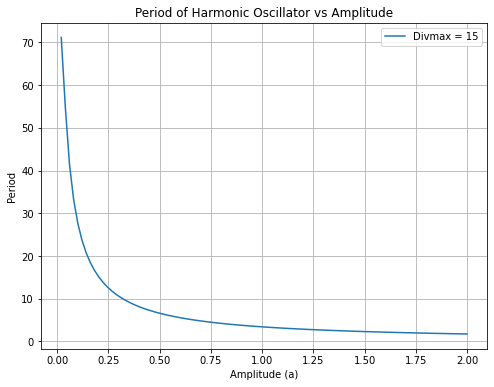

'--------------------Write your code above this line------------------------------'

In [34]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import romberg

def V(x):
    'Potential'
    return x**4

def timep_integrand(x, a):
    'Integrand for the time period calculation'
    return 1 / np.sqrt(V(a) - V(x))

def calculate_period_with_romberg(a, divmax):
    'Calculate the period using romberg'
    try:
        epsilon = 1e-2  # Small positive value to avoid singularity at x=0
        result = romberg(timep_integrand, 0, a - epsilon, args=(a,), divmax=divmax)
        return np.sqrt(8) * result
    except Exception as e:
        print(f'Error in Romberg integration: {e}')
        return np.nan

# Generate amplitudes from 0 to 2
amplitudes = np.linspace(0, 2, 100)

# Set divmax value for romberg
divmax = 15

# Calculate periods for each amplitude
periods = [calculate_period_with_romberg(a, divmax) for a in amplitudes]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(amplitudes, periods, label=f'Divmax = {divmax}')
plt.title('Period of Harmonic Oscillator vs Amplitude')
plt.xlabel('Amplitude (a)')
plt.ylabel('Period')
plt.legend()
plt.grid(True)
plt.show()
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Black Body Radiation </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 2. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total rate at which energy is radiated by a black body per unit area over all frequencies is 

$$ W = \frac{2 \pi k_B^4T^4}{c^2 {h}^3} \int _0^\infty \frac{x^3}{e^x -1} dx $$


## A) 
Write a function to to evaluate the integral in this expression. You will need to change the variables to go from an infinite range to a finite range. What is the change of variable and new functional form? The variable to go from range 0 to $\infty$ to a finite range of is 

$$ z = \frac{x}{1+x} $$
or equivalently
$$ x = \frac{z}{1-z} $$


In [16]:
#Constants
import numpy as np
from scipy import integrate

# Constants
k = 1.38064852e-23 
h = 6.626e-34
pi = np.pi
c = 3e8
hb = h / (2 * pi)
prefactor = k**4 / c**2 / hb**3 / (4 * pi**2)
stfconst = 5.670367e-8

def integrand(z):
    return z**3 / ((1 - z)**5 * (np.exp(z / (1 - z)) - 1))

def blackbody_var(z):
    return prefactor * integrate.quad(integrand, 0, 1)[0]

# Calculate the result
result = blackbody_var(0)
print(result)

5.662703503454043e-08


<ipython-input-16-d06159a49be8>:15: RuntimeWarning: overflow encountered in exp
  return z**3 / ((1 - z)**5 * (np.exp(z / (1 - z)) - 1))


## B) 
According to Stefan's law, the total energy given off by a black-body per unit area per second is given by 
$$ W = \sigma T^4 $$. Use the integral to calculate the value of Stefan Boltzmann constant $\sigma$. Use 'fixed_quad' function to do the integral.   


In [17]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
from scipy import integrate

# Constants
k = 1.38064852e-23 
h = 6.626e-34
pi = np.pi
c = 3e8
hb = h / (2 * pi)
prefactor = k**4 / c**2 / hb**3 / (4 * pi**2)

# Define the integrand function
def integrand(z):
    return z**3 / ((1 - z)**5 * (np.exp(z / (1 - z)) - 1))

# Calculate the Stefan-Boltzmann constant (sigma) using 'fixed_quad'
result, _ = integrate.fixed_quad(lambda z: integrand(z), 0, 1)

# Calculate sigma
sigma = prefactor * result

# Compare with the known Stefan-Boltzmann constant value
stefan_boltzmann_constant = 5.670367e-8

# Print the result and the comparison
print("Calculated Stefan-Boltzmann constant:", sigma)
print("Known Stefan-Boltzmann constant:", stefan_boltzmann_constant)
'''--------------------Write your code above this line------------------------------'''

Calculated Stefan-Boltzmann constant: 5.97459477974443e-08
Known Stefan-Boltzmann constant: 5.670367e-08


'--------------------Write your code above this line------------------------------'

## C) 
Inbuilt 'quad' function can support an infinite range for integration. Write another function to do the integration from 0 to $\infty$ and compare your answer.

In [18]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
from scipy import integrate

# Constants
k = 1.38064852e-23 
h = 6.626e-34
pi = np.pi
c = 3e8
hb = h / (2 * pi)
prefactor = k**4 / c**2 / hb**3 / (4 * pi**2)

# Define the integrand function
def integrand(x):
    return x**3 / (np.exp(x) - 1)

# Calculate the Stefan-Boltzmann constant (sigma) using 'quad' for infinite range
result, _ = integrate.quad(lambda x: integrand(x / (1 + x)) / (1 + x)**2, 0, np.inf)

# Calculate sigma
sigma = prefactor * result

# Compare with the known Stefan-Boltzmann constant value
stefan_boltzmann_constant = 5.670367e-8

# Print the result and the comparison
print("Calculated Stefan-Boltzmann constant using 'quad':", sigma)
print("Known Stefan-Boltzmann constant:", stefan_boltzmann_constant)
'''--------------------Write your code above this line------------------------------'''

Calculated Stefan-Boltzmann constant using 'quad': 1.9602972047825998e-09
Known Stefan-Boltzmann constant: 5.670367e-08


'--------------------Write your code above this line------------------------------'

<div style="text-align: center;">
    <h2><strong> Planetary Orbit Integration </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 4. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


One of the great achievements in the history of science was the discovery of the laws of J. Kepler, based on many precise measurements of the positions of Mars by Tycho Brahe and himself. The planets move in elliptic orbits with the sun at one of the foci (Kepler’s first law).

Newton (Principia 1687) then explained this motion by his general law of gravitational attraction (proportional to $1/r^2$) and the relation between forces and acceleration. This then opened the way for treating arbitrary celestial motions by solving differential equations.


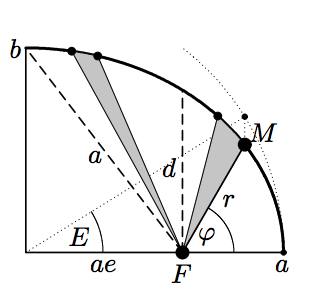


Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.




## A) 
 Q1. Using 400000 steps, use the explicit Euler method (Let $f(q) = \frac{dq}{dt}$. Then, $q(t+\Delta t) = \Delta t \cdot f(q)$ for small $\Delta t$) and plot the orbit of the planet. Assume $e = 0.6$ and integrate to a final time of $T_f = 200$.
 
 $$ q_{n+1} = q_n + \Delta t \cdot \dot{q_n} $$
$$ \dot{q}_{n+1} = p_{n+1} = p_n + \Delta t \cdot \dot{p_n} $$

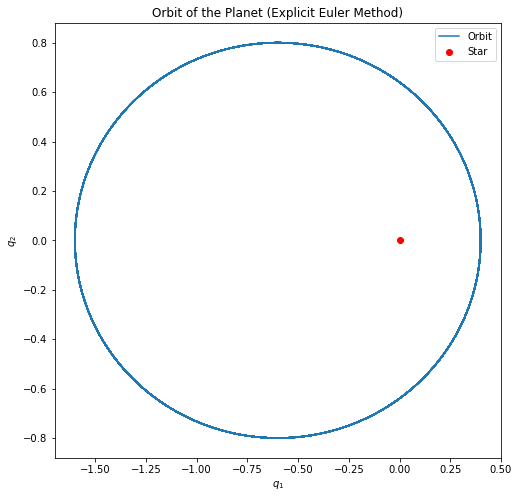

'--------------------Write your code above this line------------------------------'

In [24]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
e = 0.6  # eccentricity
Tf = 200  # final time
dt = Tf / 400000  # time step

# Initial conditions
q1_0 = 1 - e
q2_0 = 0
p1_0 = 0
p2_0 = np.sqrt((1 + e) / (1 - e))

# Define the Hamiltonian system
def hamiltonian_system(t, y):
    q1, q2, p1, p2 = y
    dq1dt = p1
    dq2dt = p2
    dp1dt = -q1 / ((q1**2 + q2**2)**(3/2))
    dp2dt = -q2 / ((q1**2 + q2**2)**(3/2))
    return [dq1dt, dq2dt, dp1dt, dp2dt]

# Solve the system using explicit Euler method
solution = solve_ivp(hamiltonian_system, [0, Tf], [q1_0, q2_0, p1_0, p2_0], method='RK23', max_step=dt)

# Extract results
q1 = solution.y[0]
q2 = solution.y[1]

# Plot the orbit
plt.figure(figsize=(8, 8))
plt.plot(q1, q2, label='Orbit')
plt.scatter([0], [0], color='red', marker='o', label='Star')
plt.title('Orbit of the Planet (Explicit Euler Method)')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.legend()
plt.show()
'''--------------------Write your code above this line------------------------------'''

## B) 
Using 400000 steps, use the symplectic Euler method. 

$$ p_{n+1} = p_n - \Delta t H_q(p_{n+1}, q_n) $$
$$ q_{n+1} = q_n + \Delta t H_p(p_{n+1}, q_n) $$
or
$$ q_{n+1} = q_n + \Delta t H_p(p_n, q_{n+1}) $$
$$ p_{n+1} = p_n - \Delta t H_p(p_n, q_{n+1}) $$
where $H_p$ and $H_q$ denote the column vectors of partial derivatives of the Hamiltonian with respect to $p$ and $q$, respectively. i.e. $H_{p_1} = p_1, H_{q_1} = \frac{q_1}{(q_1^2 + q_2^2)^{3/2}}, H_{p_2} = p_2, H_{q_2} = \frac{q_2}{(q_1^2 + q_2^2)^{3/2}}$. 
 
 
Again plot the orbit of the planet. Compare your results in A) and B) by plotting both solutions in the same figure. 

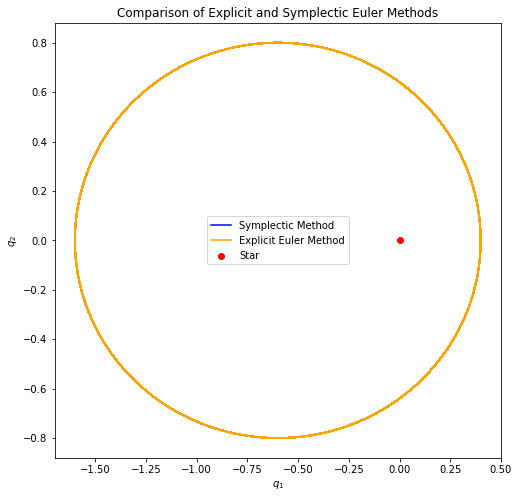

'--------------------Write your code above this line------------------------------'

In [25]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
e = 0.6  # eccentricity
Tf = 200  # final time
dt = Tf / 400000  # time step

# Initial conditions
q1_0 = 1 - e
q2_0 = 0
p1_0 = 0
p2_0 = np.sqrt((1 + e) / (1 - e))

# Define the Hamiltonian system for symplectic method
def hamiltonian_system_symplectic(t, y):
    q1, q2, p1, p2 = y
    dp1dt = -q1 / ((q1**2 + q2**2)**(3/2))
    dp2dt = -q2 / ((q1**2 + q2**2)**(3/2))
    dq1dt = p1
    dq2dt = p2
    return [dq1dt, dq2dt, dp1dt, dp2dt]

# Solve the system using symplectic Euler method
solution_symplectic = solve_ivp(hamiltonian_system_symplectic, [0, Tf], [q1_0, q2_0, p1_0, p2_0], method='RK23', max_step=dt)

# Extract results for symplectic method
q1_symplectic = solution_symplectic.y[0]
q2_symplectic = solution_symplectic.y[1]

# Plot the orbit for symplectic method
plt.figure(figsize=(8, 8))
plt.plot(q1_symplectic, q2_symplectic, label='Symplectic Method', color='blue')

# Add the explicit Euler method to the same plot
plt.plot(q1, q2, label='Explicit Euler Method', color='orange')

plt.scatter([0], [0], color='red', marker='o', label='Star')
plt.title('Comparison of Explicit and Symplectic Euler Methods')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.legend()
plt.show()
'''--------------------Write your code above this line------------------------------'''
#not much to compare...